In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('Data/Cleaner/Radon.csv')

In [9]:
df.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,stoptm,startdt,stopdt,activity,pcterr,adjwt,dupflag,zipflag,cntyfips,county
0,1,AL,AL,1,36067,6,1,1,3,,...,1730,22487,22687,0.4,0.0,395.145068,0,0,1,AUTAUGA
1,2,AL,AL,1,36067,6,1,1,3,,...,130,22487,22887,0.6,31.5,453.339921,0,0,1,AUTAUGA
2,3,AL,AL,1,36067,6,1,1,1,,...,840,30387,30387,1.5,11.2,395.145068,0,0,1,AUTAUGA
3,4,AL,AL,1,36067,6,1,0,7,,...,1436,22787,30387,6.3,4.6,395.145068,0,0,1,AUTAUGA
4,5,AL,AL,1,36067,6,1,1,3,,...,1600,30387,30387,0.2,0.0,376.809515,0,0,1,AUTAUGA


In [15]:
df = df[df['state'] == 'CA']
df = df.drop(['idnum', 'state', 'state2', 'stfips', 'zip', 'region', 'typebldg', 'floor', 'room', 'basement', 'windoor', 'rep', 'stratum', 'wave', 'starttm', 'stoptm', 'startdt', 'stopdt', 'dupflag', 'zipflag', 'cntyfips'], 1)
d1 = df.groupby('county')['adjwt'].mean().reset_index()
d1.sort_values('adjwt', ascending=False, inplace=True)
d1.columns = ['County', 'adjwt Radon']
d1.head(10)

,County,adjwt Radon
11,IMPERIAL,6299.866590
34,SAN BERNARDINO,6295.748033
35,SAN DIEGO,6112.147825
31,RIVERSIDE,6094.614724
28,ORANGE,6033.230563
17,LOS ANGELES,5926.043696
36,SAN FRANCISCO,1537.840576
41,SANTA CLARA,1529.556410
38,SAN LUIS OBISPO,1526.471332
42,SANTA CRUZ,1525.002097


In [16]:
d2 = df.groupby('county')['activity'].mean().reset_index()
d2.sort_values('activity', ascending=False, inplace=True)
d2.columns = ['County', 'Radon']
d2.head(10)

,County,Radon
38,SAN LUIS OBISPO,2.673333
18,MADERA,2.604167
37,SAN JOAQUIN,2.486364
27,NEVADA,2.365385
22,MERCED,2.050000
52,TULARE,1.873016
24,MONO,1.850000
48,STANISLAUS,1.800000
12,INYO,1.700000
40,SANTA BARBARA,1.520000


In [19]:
d2.shape

(57, 2)

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


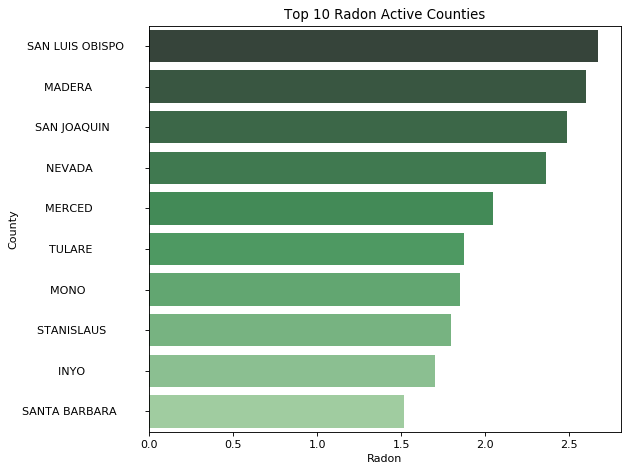

In [28]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
d = d2[d2['Radon'] > 1.5]
# d = d2[:10]
plt.title('Top 10 Radon Active Counties')
sns.barplot(x='Radon', y='County', data=d, palette='Greens_d')
plt.tight_layout()

/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


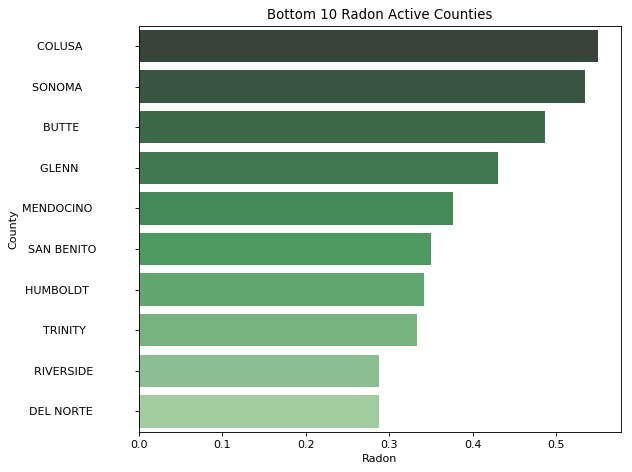

In [33]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# d = d2[d2['Radon'] < .5]
d = d2[47:]
plt.title('Bottom 10 Radon Active Counties')
sns.barplot(x='Radon', y='County', data=d, palette='Greens_d')
plt.tight_layout()